In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [24]:
wine = pd.read_csv('crimes2018.csv',sep=',',low_memory=False)
wine = wine[:50000]
wine = wine.drop('ID',axis = 1)
wine = wine.drop('Case Number',axis = 1)
wine = wine.drop('District',axis = 1)
wine = wine.drop('Ward',axis = 1)
wine = wine.drop('X Coordinate',axis = 1)
wine = wine.drop('Y Coordinate',axis = 1)
wine = wine.drop('Updated On',axis = 1)
wine = wine.drop('Longitude',axis = 1)
wine = wine.drop('Latitude',axis = 1)
wine = wine.drop('Location',axis = 1)
wine = wine.drop('Block',axis = 1)
wine = wine.drop('IUCR',axis = 1)
wine = wine.drop('Description',axis = 1)
wine = wine.drop('Beat',axis = 1)
wine = wine.drop('Community Area',axis = 1)
wine = wine.drop('Primary Type',axis = 1)
wine = wine.drop('Year',axis = 1)

In [3]:
wine.isnull().sum()

Date        0
Arrest      0
Domestic    0
District    0
FBI Code    0
dtype: int64

In [4]:
wine = wine.dropna()

In [5]:
wine.isnull().sum()

Date        0
Arrest      0
Domestic    0
District    0
FBI Code    0
dtype: int64

In [6]:
wine.head()

,Date,Arrest,Domestic,District,FBI Code
0,09/01/2018 12:00:00 AM,False,True,5,17
1,06/10/2018 11:00:00 PM,False,False,2,02
2,05/12/2018 12:43:00 PM,False,False,12,05
3,01/28/2018 04:10:00 PM,True,False,1,02
4,12/24/2018 11:30:00 PM,False,False,11,06


In [7]:
print(wine['Location Description'].unique());

for index, row in wine.iterrows():
    if('AIRPORT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'AIRPORT';
    elif('SCHOOL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'SCHOOL';
    elif('COLLEGE/UNIVERSITY' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'SCHOOL';
    elif('RESIDENTIAL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'RESIDENTIAL';
    elif('APARTMENT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'RESIDENTIAL';
    elif('RESIDENCE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'RESIDENTIAL';
    elif('CHA' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'RESIDENTIAL';
    elif('STORE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('BAR' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('BARBERSHOP' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('BOWLING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('CAR WASH' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('WORSHIP' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('COIN' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('CREDIT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('CURRENCY' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('DAY CARE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('GAS STATION' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('HOTEL/MOTEL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('LIBRARY' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('MOVIE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('SHOP' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('POOL ROOM' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('RESTAURANT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('SAVINGS' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('SPORTS' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('DEALERSHIP' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('BANK' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('CTA' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('TRANSPORTATION' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('RAILROAD' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('PARKING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('TAXICAB' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('VEHICLE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('CONSTRUCTION' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'INDUSTRIAL';
    elif('FACTORY/MANUFACTURING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'INDUSTRIAL';
    elif('WAREHOUSE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'INDUSTRIAL';
    elif('ABANDONED' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'INDUSTRIAL';
    elif('HOSPITAL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('CEMETARY' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('FEDERAL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('FIRE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('POLICE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('JAIL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('GOVERNMENT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('MEDICAL/DENTAL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('NURSING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('NURSING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    else:
        wine.loc[index, 'Location Description'] = 'OTHER';
         

In [8]:
Dict = {};

Dict = {'APARTMENT': 'RESIDENTIAL',
        'CHA APARTMENT': 'RESIDENTIAL',
        'CTA TRAIN': 'TRANSPORT',
        'RESIDENCE': 'RESIDENTIAL',
        'BANK': 'COMMERCIAL',
        'VEHICLE NON-COMMERCIAL': 'TRANSPORT',
        'STREET': 'TRANSPORT',
        'OTHER': 'OTHER',
        'BAR OR TAVERN': 'COMMERCIAL',
        'PARKING LOT/GARAGE(NON.RESID.)': 'TRANSPORT',
        'SIDEWALK': 'OTHER',
        'BARBERSHOP': 'COMMERCIAL',
        'POLICE FACILITY/VEH PARKING LOT': 'GOVERNMENT',
        'COMMERCIAL / BUSINESS OFFICE': 'COMMERCIAL',
        'CURRENCY EXCHANGE': 'COMMERCIAL',
        'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'AIRPORT',
        'HOSPITAL BUILDING/GROUNDS': 'GOVERNMENT',
        'DEPARTMENT STORE': 'COMMERCIAL',
        'AUTO': 'COMMERCIAL',
        'PARK PROPERTY': 'OTHER',
        'HOTEL/MOTEL': 'COMMERCIAL',
        'RESTAURANT': 'COMMERCIAL',
        'ATHLETIC CLUB': 'COMMERCIAL',
        'ALLEY': 'OTHER',
        'NURSING HOME/RETIREMENT HOME': 'RESIDENTIAL',
        'SMALL RETAIL STORE': 'COMMERCIAL',
        'RESIDENCE-GARAGE': 'RESIDENTIAL',
        'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)': 'TRANSPORT',
        'SCHOOL, PUBLIC, BUILDING': 'EDUCATION',
        'CHURCH/SYNAGOGUE/PLACE OF WORSHIP': 'OTHER',
        'AUTO / BOAT / RV DEALERSHIP': 'COMMERCIAL',
        'MOVIE HOUSE/THEATER': 'COMMERCIAL',
        'CTA PLATFORM': 'TRANSPORT',
        'CEMETARY': 'OTHER',
        'SCHOOL, PRIVATE, BUILDING': 'EDUCATION',
        'GAS STATION': 'COMMERCIAL',
        'RESIDENCE PORCH/HALLWAY': 'RESIDENTIAL',
        'GOVERNMENT BUILDING/PROPERTY': 'GOVERNMENT',
        'VACANT LOT/LAND': 'OTHER',
        'GROCERY FOOD STORE' : 'COMMERCIAL',
        'RESIDENTIAL YARD (FRONT/BACK)': 'RESIDENTIAL',
        'TAVERN/LIQUOR STORE': 'COMMERCIAL',
        'CTA STATION' : 'TRANSPORT',
        'WAREHOUSE': 'COMMERCIAL',
        'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'AIRPORT',
        'SCHOOL, PUBLIC, GROUNDS': 'EDUCATION',
        'OTHER RAILROAD PROP / TRAIN DEPOT': 'TRANSPORT',
        'AIRPORT/AIRCRAFT': 'AIRPORT',
        'MEDICAL/DENTAL OFFICE': 'COMMERCIAL',
        'CONVENIENCE STORE': 'COMMERCIAL',
        'TAXICAB': 'TRANSPORT',
        'ABANDONED BUILDING': 'OTHER',
        'CTA BUS STOP': 'TRANSPORT',
        'ATM (AUTOMATIC TELLER MACHINE)': 'COMMERCIAL',
        'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA' : 'AIRPORT',
        'POOL ROOM': 'RESIDENTIAL',
        'AIRPORT VENDING ESTABLISHMENT': 'AIRPORT',
        'DAY CARE CENTER': 'COMMERCIAL',
        'VEHICLE-COMMERCIAL': 'COMMERCIAL',
        'DRUG STORE': 'COMMERCIAL',
        'CHA HALLWAY/STAIRWELL/ELEVATOR': 'GOVERNMENT',
        'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 'AIRPORT',
        'CTA BUS': 'TRANSPORT',
        'CONSTRUCTION SITE': 'COMMERCIAL',
        'FACTORY/MANUFACTURING BUILDING': 'COMMERCIAL',
        'CTA GARAGE / OTHER PROPERTY': 'TRANSPORT', 
        'COLLEGE/UNIVERSITY GROUNDS': 'EDUCATION',
        'CAR WASH': 'COMMERCIAL',
        'JAIL / LOCK-UP FACILITY' : 'GOVERNMENT',
        'AIRCRAFT': 'AIRPORT',
        'LIBRARY' : 'COMMERCIAL',
        'DRIVEWAY - RESIDENTIAL': 'RESIDENTIAL',
        'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'AIRPORT',
        'VEHICLE - DELIVERY TRUCK': 'TRANSPORT',
        'AIRPORT EXTERIOR - SECURE AREA': 'AIRPORT',
        'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'AIRPORT',
        'LAKEFRONT/WATERFRONT/RIVERBANK': 'OTHER',
        'AIRPORT PARKING LOT': 'AIRPORT',
        'AIRPORT EXTERIOR - NON-SECURE AREA': 'AIRPORT',
        'SCHOOL, PRIVATE, GROUNDS': 'EDUCATION',
        'SPORTS ARENA/STADIUM': 'COMMERCIAL',
        'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'AIRPORT',
        'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 'AIRPORT',
        'APPLIANCE STORE': 'COMMERCIAL',
        'OTHER COMMERCIAL TRANSPORTATION': 'TRANSPORT',
        'COIN OPERATED MACHINE': 'COMMERCIAL',
        'ANIMAL HOSPITAL': 'GOVERNMENT',
        'CREDIT UNION': 'COMMERCIAL',
        'SAVINGS AND LOAN': 'COMMERCIAL',
        'HIGHWAY/EXPRESSWAY': 'TRANSPORT',
        'CHA PARKING LOT/GROUNDS': 'GOVERNMENT',
        'CLEANING STORE': 'COMMERCIAL', 
        'PAWN SHOP': 'COMMERCIAL',
        'BRIDGE': 'TRANSPORT',
        'COLLEGE/UNIVERSITY RESIDENCE HALL': 'EDUCATION',
        'FOREST PRESERVE': 'OTHER',
        'FEDERAL BUILDING': 'GOVERNMENT',
        'NEWSSTAND': 'COMMERCIAL',
        'BOWLING ALLEY': 'COMMERCIAL',
        'VEHICLE-COMMERCIAL - TROLLEY BUS': 'TRANSPORT',
        'FIRE STATION': 'GOVERNMENT',
        'CTA TRACKS - RIGHT OF WAY' : 'TRANSPORT',
        'BOAT/WATERCRAFT': 'TRANSPORT',
        'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS': 'COMMERCIAL',
        'HORSE STABLE': 'RESIDENTIAL',
        'FARM': 'RESIDENTIAL',
        'KENNEL': 'COMMERCIAL',
        'PARKING LOT': 'TRANSPORT',
        'HOUSE': 'RESIDENTIAL',
        'CTA PROPERTY' : 'TRANSPORT',
        'RETAIL STORE': 'COMMERCIAL',
        'HOTEL': 'COMMERCIAL',
        'PORCH': 'OTHER',
        'VACANT LOT' : 'TRANSPORT',
        'YMCA': 'COMMERCIAL',
        'GOVERNMENT BUILDING': 'GOVERNMENT',
        'DRIVEWAY': 'TRANSPORT',
        'GARAGE/AUTO REPAIR': 'COMMERCIAL',
        'HALLWAY': 'RESIDENTIAL',
        'YARD': 'RESIDENTIAL',
        'CHA GROUNDS' : 'GOVERNMENT',
        'GARAGE': 'TRANSPORT',
        'LIQUOR STORE': 'COMMERCIAL',
        'RIVER BANK': 'OTHER',
        'GAS STATION DRIVE/PROP.'
        'WOODED AREA': 'OTHER',
        'OFFICE': 'COMMERCIAL',
        'BARBER SHOP/BEAUTY SALON': 'COMMERCIAL',
        'STAIRWELL': 'OTHER',
        'HOSPITAL': 'GOVERNMENT',
        'CHA PARKING LOT' : 'GOVERNMENT',
        'GANGWAY': 'OTHER'}

for index, row in wine.iterrows():
    #print(row['Location Description']);
    #print(Dict[wine.loc[index, 'Location Description']]);
   wine.loc[index, 'Location Description'] = Dict[wine.loc[index, 'Location Description']];

        


In [9]:
#Encoder to convert string values
le = LabelEncoder()

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 5 columns):
Date        50000 non-null object
Arrest      50000 non-null bool
Domestic    50000 non-null bool
District    50000 non-null int64
FBI Code    50000 non-null object
dtypes: bool(2), int64(1), object(2)
memory usage: 1.6+ MB


In [11]:
X = wine.drop('Location Description', axis = 1)
y = wine['Location Description']
def dummyEncode(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object','bool']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df
    
X = dummyEncode(X)
X.head()

,Date,Arrest,Domestic,FBI Code
0,23924,0,1,19
1,22829,0,0,2
2,22557,0,0,6
3,8312,1,0,2
4,25853,0,0,7


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train[:10]

array([[ 0.60116491, -0.53093026, -0.43704449,  0.19854681],
       [ 0.09919716, -0.53093026,  2.28809655,  0.67047203],
       [ 1.10577827, -0.53093026,  2.28809655, -0.27337842],
       [-0.89721928, -0.53093026, -0.43704449, -0.74530364],
       [-1.27665399, -0.53093026, -0.43704449, -0.74530364],
       [-1.08547459, -0.53093026, -0.43704449, -0.58799523],
       [-0.35682071,  1.88348655, -0.43704449, -0.43068682],
       [ 1.0744488 , -0.53093026, -0.43704449,  2.0862477 ],
       [ 0.06243725,  1.88348655, -0.43704449,  2.0862477 ],
       [-0.34749149,  1.88348655, -0.43704449,  1.92893929]])

In [15]:
#Neural Network
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.13      0.66      0.22       651
           2       0.00      0.00      0.00       439
           3       0.00      0.00      0.00       455
           4       0.13      0.00      0.01       523
           5       0.00      0.00      0.00       444
           6       0.08      0.18      0.11       589
           7       0.00      0.00      0.00       525
           8       0.08      0.39      0.14       645
           9       0.00      0.00      0.00       408
          10       0.05      0.00      0.00       443
          11       0.16      0.52      0.24       691
          12       0.00      0.00      0.00       457
          14       0.00      0.00      0.00       332
          15       0.00      0.00      0.00       377
          16       0.00      0.00      0.00       358
          17       0.00      0.00      0.00       293
          18       0.00      0.00      0.00       611
          19       0.00    

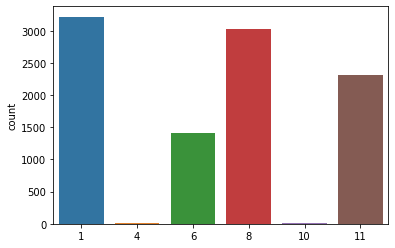

In [16]:
#Lets see how our model preformed
print(classification_report(y_test, pred_mlpc)) #Shows accuracy of model
print(confusion_matrix(y_test, pred_mlpc))
print(accuracy_score(y_test, pred_mlpc))
sns.countplot(pred_mlpc)

In [17]:
import pickle

In [18]:
filename = "model.sav"
pickle.dump(mlpc, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open(filename, 'rb'))

In [20]:
print(loaded_model.score(X_test,y_test))

0.1145


In [23]:
Xnew = [["25/12/2018 11:00:00 PM", False, True, "520"]]
le = LabelEncoder()

df=pd.DataFrame(Xnew, columns=['Date',
                               'Arrest', 
                               'Domestic',
                               'FBI Code'])

df = dummyEncode(df)

df = sc.transform(df)

pred_xnew = mlpc.predict(df)

print(pred_xnew)

[11]
